# Project Title
 

## Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sn
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

## Reading the Data

In [3]:
df_pensions=pd.read_csv("Data\Cantidad_de_pensionados_de_Colpensiones_por_rango_de_edad.csv")
df_TRM=pd.read_csv("Data\Tasa_de_Cambio_Representativa_del_Mercado-_TRM.csv")
df_min_wage=pd.read_excel("Data\SLR_Serie historica IQY.xlsx",header=5)

## Cleaning the Data

Cleaning of Pension Dataset

In [4]:
df_pensions.head()
df_pensions.rename(columns={"Rango Edad":"Age Range"
                         ,"Cantidad Personas":"Num of People",
                         "Rango salarial (SMLV)":"Salary Range(minumim wages)",
                         "Genero":"Gender",
                         "Tipo Pension":"Pension Type"},inplace=True)

df_pensions["Pension Type"]=df_pensions["Pension Type"].str.replace("Invalidez","Disability")
df_pensions["Pension Type"]=df_pensions["Pension Type"].str.replace("Vejez","Old Age")
df_pensions["Pension Type"]=df_pensions["Pension Type"].str.replace("Sobrevivientes","Survivor")
df_pensions["Pension Type"].unique()

df_pensions["Salary Range(minumim wages)"].unique()
df_pensions["Salary Range(minumim wages)"]=df_pensions["Salary Range(minumim wages)"].str.replace("Hasta 2","Less or equal to 2")
df_pensions["Salary Range(minumim wages)"]=df_pensions["Salary Range(minumim wages)"].str.replace("Entre 2 y 4","Between 2 and 4")
df_pensions["Salary Range(minumim wages)"]=df_pensions["Salary Range(minumim wages)"].str.replace("Entre 4 y 7","Between 4 and 7")
df_pensions["Salary Range(minumim wages)"]=df_pensions["Salary Range(minumim wages)"].str.replace("Entre 7 y 10","Between 7 and 10")
df_pensions["Salary Range(minumim wages)"]=df_pensions["Salary Range(minumim wages)"].str.replace("Entre 10 y 13","Between 10 and 13")
df_pensions["Salary Range(minumim wages)"]=df_pensions["Salary Range(minumim wages)"].str.replace("Entre 13 y 16","Between 13 and 16")
df_pensions["Salary Range(minumim wages)"]=df_pensions["Salary Range(minumim wages)"].str.replace("Mayor a 16","More than 16")
df_pensions["Salary Range(minumim wages)"].unique()
df_pensions.head()


,Age Range,Num of People,Salary Range(minumim wages),Gender,Pension Type
0,0-19,0,Less or equal to 2,M,Disability
1,20-24,8,Less or equal to 2,M,Disability
2,25-29,82,Less or equal to 2,M,Disability
3,30-34,252,Less or equal to 2,M,Disability
4,35-39,652,Less or equal to 2,M,Disability


Cleaning Colombian Minimum Wage Data

In [5]:
df_min_wage.head()
df_min_wage.drop(columns=["Unnamed: 5","Salario mínimo diario (COP)","Decretos del Gobierno Nacional"],inplace=True)
df_min_wage.rename(columns={"Año (aaaa)":"Year","Salario mínimo mensual (COP)":"Monthly Minimum Wage (COP)","Variación porcentual anual %":"Yearly Percentage Variation %"},inplace=True)
df_min_wage.drop(df_min_wage.index[39:],inplace=True)
df_min_wage.head()



,Year,Monthly Minimum Wage (COP),Yearly Percentage Variation %
0,1984,11298.0,NaN
1,1985,13558.0,20.0
2,1986,16811.0,24.0
3,1987,20510.0,22.0
4,1988,25637.0,25.0


Cleaning of Representative Market exchange Rate (TRM -> spanish abreviation)

In [6]:
df_TRM.head()
df_TRM.drop(columns="UNIDAD",inplace=True)
df_TRM.rename(columns={"VALOR":"Value","VIGENCIADESDE":"Valid Since","VIGENCIAHASTA":"Valid until"},inplace=True)
df_TRM["Valid Since"]=pd.to_datetime(df_TRM["Valid Since"],dayfirst=True)
df_TRM["Valid until"]=pd.to_datetime(df_TRM["Valid until"],dayfirst=True)
#Values that were valid for more than the same day are an indicator of the value being inaccurate, the value should change daily.
df_TRM["Date"]=df_TRM["Valid Since"]
df_TRM.drop(columns=["Valid Since","Valid until"],inplace=True)
df_TRM.head()

,Value,Date
0,2850.98,2002-10-09
1,2854.04,2002-10-10
2,2870.63,2002-10-11
3,2861.16,2002-10-12
4,2852.99,2002-10-16


## Exploring the Data

### TRM Visualization

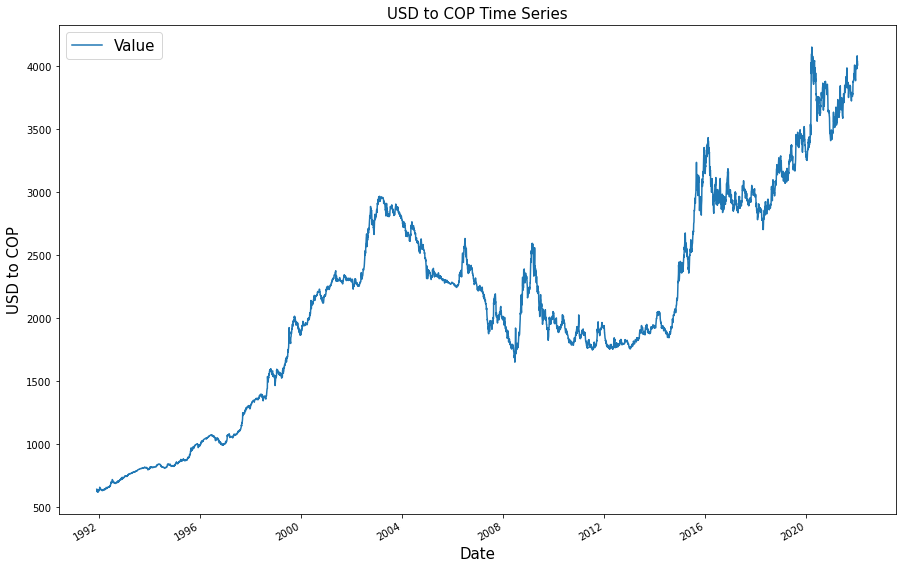

In [7]:
rcParams["figure.figsize"]=15,10
plot=df_TRM.plot(x="Date",y="Value")
plt.title("USD to COP Time Series",fontsize=15)
plt.ylabel("USD to COP",fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.legend(fontsize=15)
ax = plt.gca()


With this plot we can confirm the data has an aggresive upwards trend, thus meaning the Colombian peso has severly depreciated in comaprison to US Dollars.

### Minimum Wage Visualization

Text(0.5, 1.0, 'Yearly Percentage Variation % vs Time')

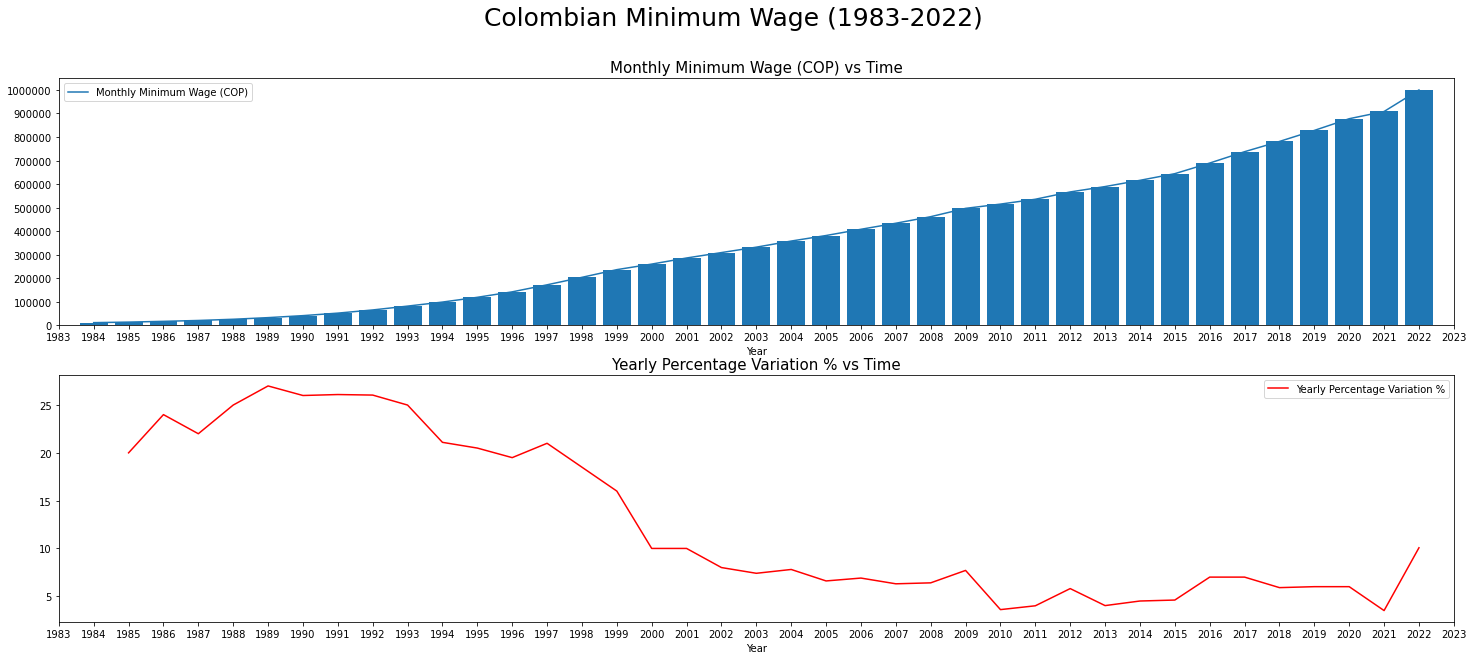

In [9]:
rcParams['figure.figsize']=25,10 
fig, axs = plt.subplots(2,1)
df_min_wage.plot(x="Year",y=["Monthly Minimum Wage (COP)","Yearly Percentage Variation %"],xlim=[1983,2023],subplots=True,color=["tab:blue","red"],ax=axs)
axs[0].bar(x=df_min_wage["Year"],height=df_min_wage["Monthly Minimum Wage (COP)"])
axs[0].get_yaxis().get_major_formatter().set_scientific(False)
axs[0].locator_params(axis="x", nbins=43)
axs[0].locator_params(axis="y", nbins=20)
axs[1].locator_params(axis="x", nbins=43)
fig.suptitle("Colombian Minimum Wage (1983-2022)",fontsize=25)
axs[0].set_title("Monthly Minimum Wage (COP) vs Time",fontsize=15)
axs[1].set_title("Yearly Percentage Variation % vs Time",fontsize=15)

We can see that the Colombian minimum wage increases each year, but the percentage increase has a decreasing tendency. In other words; each year, Colombian minimum wage increases less.

### Pensions Visualization

In [10]:
df_pensions.dtypes

Age Range                      object
Num of People                   int64
Salary Range(minumim wages)    object
Gender                         object
Pension Type                   object
dtype: object

Text(0.5, 1.0, 'Colombian Pensions, Number of People by Age Range(2018-2021)')

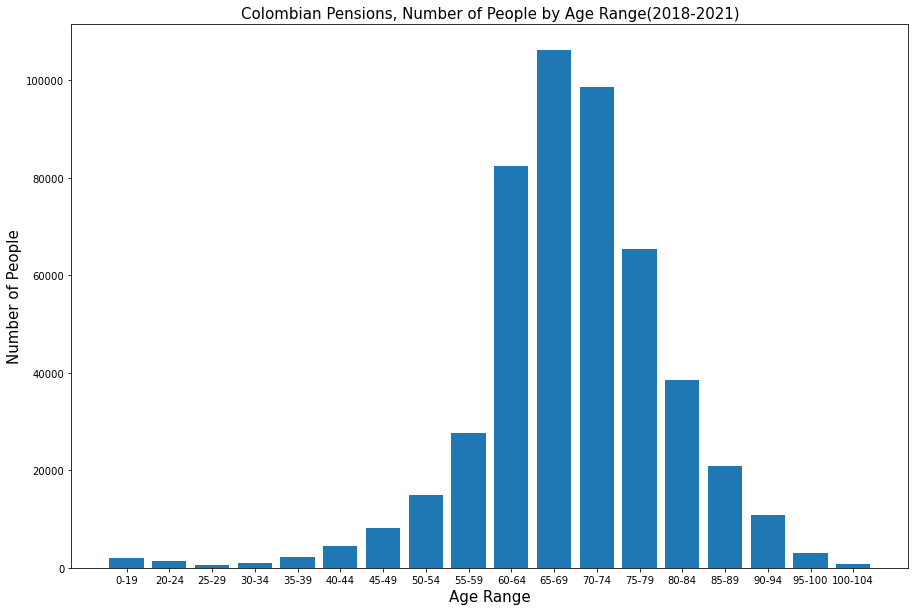

In [11]:
rcParams['figure.figsize']=15,10 
plt.bar(x=df_pensions["Age Range"],height=df_pensions["Num of People"])
plt.xlabel("Age Range",fontsize=15)
plt.ylabel("Number of People",fontsize=15)
plt.title("Colombian Pensions, Number of People by Age Range(2018-2021)",fontsize=15)

In [12]:
df_pensions.iloc[df_pensions["Num of People"].idxmax()]

Age Range                                   65-69
Num of People                              106233
Salary Range(minumim wages)    Less or equal to 2
Gender                                          F
Pension Type                              Old Age
Name: 280, dtype: object

The demographic with most people with pensions are Women with ages of 65-69 years old, earning 2 or less colombian mimimum wages and with a pension type of Old Age.
The majority of colombian pensioners earn 2 or less minimum wages.

Text(0.5, 1.0, 'Colombian Pensions, Number of People by Salary Range(in minumim wages)(2018-2021)')

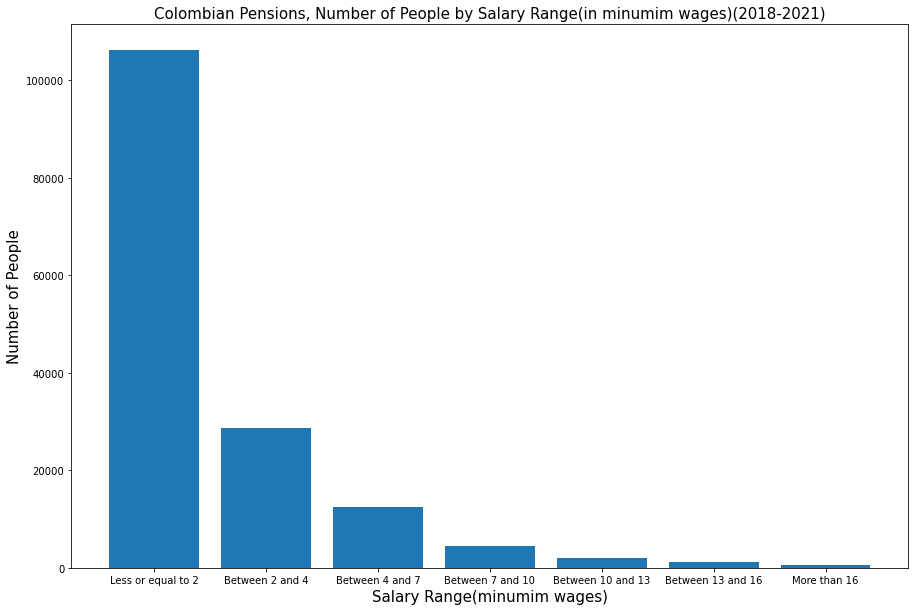

In [13]:
rcParams['figure.figsize']=15,10 
plt.bar(x=df_pensions["Salary Range(minumim wages)"],height=df_pensions["Num of People"])
plt.xlabel("Salary Range(minumim wages)",fontsize=15)
plt.ylabel("Number of People",fontsize=15)
plt.title("Colombian Pensions, Number of People by Salary Range(in minumim wages)(2018-2021)",fontsize=15)


In [14]:
df_pensions_grouped=df_pensions.groupby(by="Salary Range(minumim wages)").sum().sort_values(by="Num of People",ascending=False)
df_pensions_grouped["%"]=(df_pensions_grouped["Num of People"]/sum(df_pensions_grouped["Num of People"]))*100
df_pensions_grouped

,Num of People,%
Salary Range(minumim wages),,
Less or equal to 2,1144518,77.549593
Between 2 and 4,212030,14.366607
Between 4 and 7,78208,5.299173
Between 7 and 10,24270,1.644473
Between 10 and 13,10192,0.690584
Between 13 and 16,4775,0.323542
More than 16,1860,0.126029


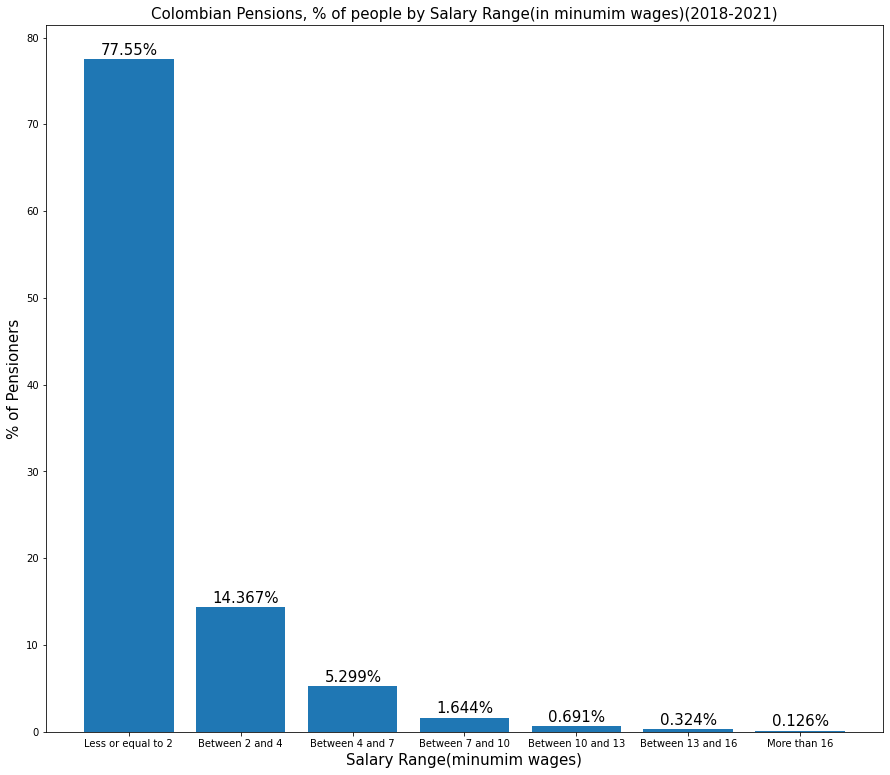

In [52]:
rcParams['figure.figsize']=15,13 
bars=plt.bar(x=df_pensions_grouped.index,height=df_pensions_grouped["%"])
plt.xlabel("Salary Range(minumim wages)",fontsize=15)
plt.ylabel("% of Pensioners",fontsize=15)
plt.title("Colombian Pensions, % of people by Salary Range(in minumim wages)(2018-2021)",fontsize=15)
for bar in bars:
    yval = round(bar.get_height(),3)
    plt.text(bar.get_x()+0.15, yval+0.5, f"{yval}%", fontsize=15)

### Analysis

In [25]:
df_TRM["Year"]=df_TRM["Date"].dt.year
df_TRM.head()
df_TRM_grouped=df_TRM.drop(columns="Date")
df_TRM_grouped=df_TRM_grouped.groupby(by="Year").max()
df_TRM_grouped.reset_index(inplace=True)
df_TRM_grouped.rename(columns={"Value":"USD to COP"},inplace=True)
df_TRM_grouped.head()



,Year,USD to COP
0,1991,643.42
1,1992,738.19
2,1993,819.55
3,1994,844.40
4,1995,1003.47


In [33]:
df_joined=pd.merge(df_TRM_grouped,df_min_wage,on="Year")
df_joined["Monthly Minimum Wage (USD)"]=df_joined["Monthly Minimum Wage (COP)"]/df_joined["USD to COP"]
df_joined.head()


,Year,USD to COP,Monthly Minimum Wage (COP),Yearly Percentage Variation %,Monthly Minimum Wage (USD)
0,1991,643.42,51720.0,26.100,80.382954
1,1992,738.19,65190.0,26.044,88.310598
2,1993,819.55,81510.0,25.000,99.457019
3,1994,844.40,98700.0,21.100,116.887731
4,1995,1003.47,118934.0,20.500,118.522726


Text(0.5, 1.0, 'Monthly Minimum Wage (USD) vs Time')

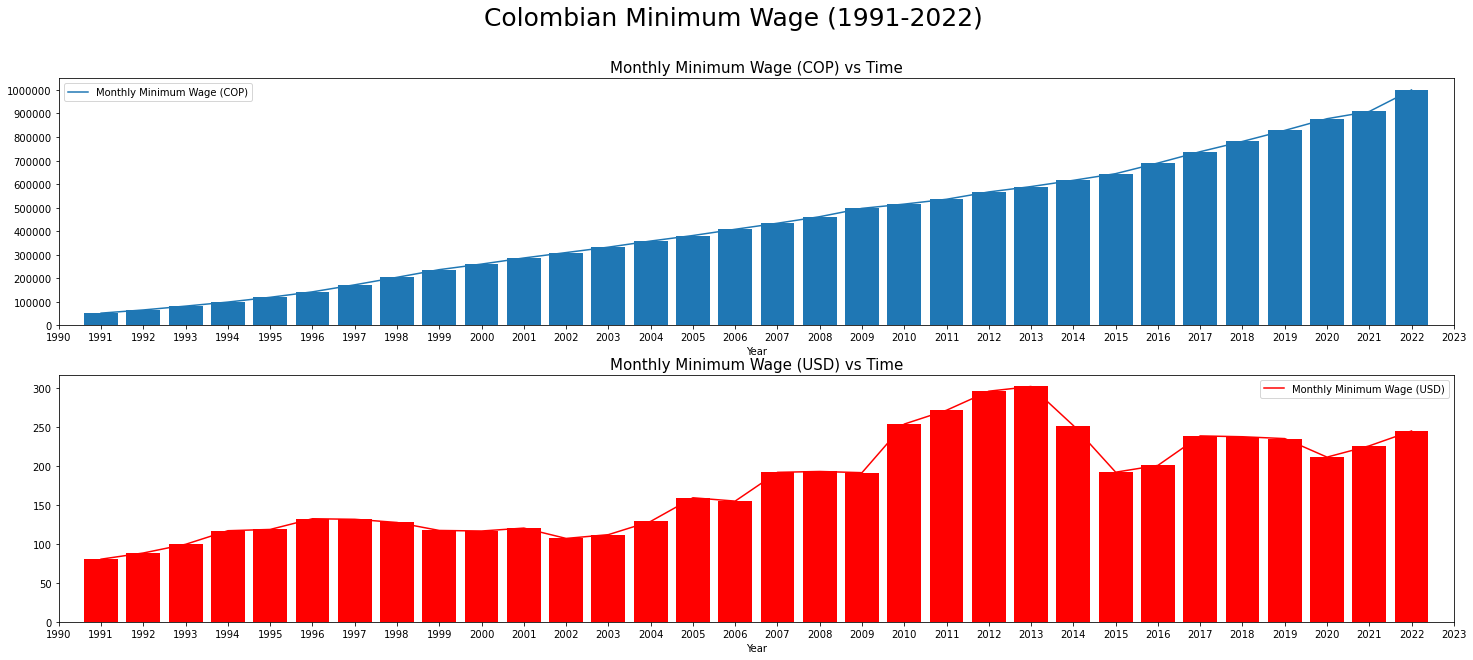

In [51]:
rcParams['figure.figsize']=25,10 
fig, axs = plt.subplots(2,1)
df_joined.plot(x="Year",y=["Monthly Minimum Wage (COP)","Monthly Minimum Wage (USD)"],xlim=[1990,2023],subplots=True,color=["tab:blue","red"],ax=axs)
axs[0].bar(x=df_joined["Year"],height=df_joined["Monthly Minimum Wage (COP)"])
axs[0].get_yaxis().get_major_formatter().set_scientific(False)
axs[0].locator_params(axis="x", nbins=43)
axs[0].locator_params(axis="y", nbins=20)
axs[1].bar(x=df_joined["Year"],height=df_joined["Monthly Minimum Wage (USD)"],color="red")
axs[1].locator_params(axis="x", nbins=43)
fig.suptitle("Colombian Minimum Wage (1991-2022)",fontsize=25)
axs[0].set_title("Monthly Minimum Wage (COP) vs Time",fontsize=15)
axs[1].set_title("Monthly Minimum Wage (USD) vs Time",fontsize=15)